In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Read File

In [2]:
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Basic Info

In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Handle Missing Values

In [8]:
df.fillna({'director':'Unknown'},inplace=True)

In [9]:
df.fillna({'country':'ffill'},inplace=True)

In [10]:
df.fillna({'cast':"Missing"},inplace=True)

In [11]:
df.fillna({"rating":"mode[0]"},inplace=True)

In [12]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Moives And TV Shows Count


In [14]:
show_movie=df.value_counts('type')
show_movie

type
Movie      6128
TV Show    2666
Name: count, dtype: int64

# 📌 Comparison Between Movies and TV Shows

### This bar chart compares the number of Movies and TV Shows available on Netflix.


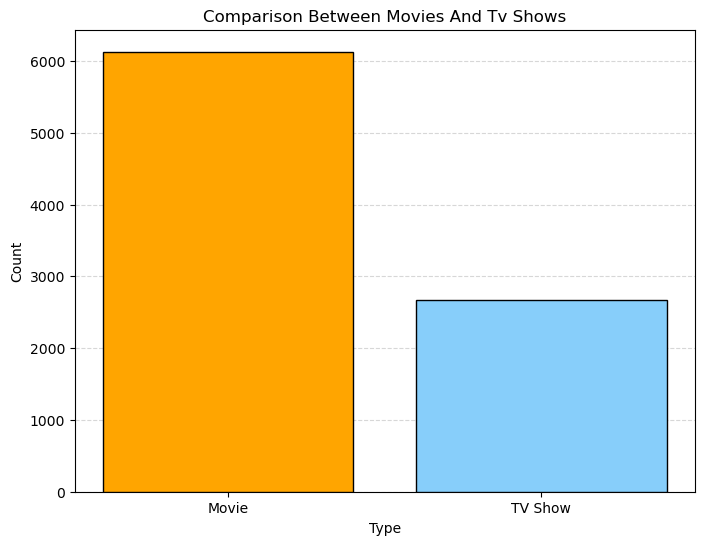

In [123]:
colors=['orange','lightskyblue']
plt.figure(figsize=(8,6))
plt.bar(show_movie.index,show_movie.values,color=colors , edgecolor='black',zorder=3)
plt.title('Comparison Between Movies And Tv Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.grid(True ,axis='y', linestyle='--' ,alpha=0.5)
plt.savefig('comparison_movies_tvshows.png', dpi=300)
plt.show()


**Explanation:**

- **Purpose**: To compare how many Movies vs TV Shows are available on Netflix.
- **What it shows**: The orange bar shows the count of Movies, and the blue bar shows the count of TV Shows.
- **Code parts**:
  - `show_movie.index`: Categories (Movie/TV Show)
  - `show_movie.values`: Count values
  - `colors`: Custom colors
  - `edgecolor='black'`: Gives border to bars
  - `grid`: Improves readability
- **Conclusion**: Netflix contains more Movies than TV Shows (or vice versa).


# 2.Year-wise Netflix Content Release Trend

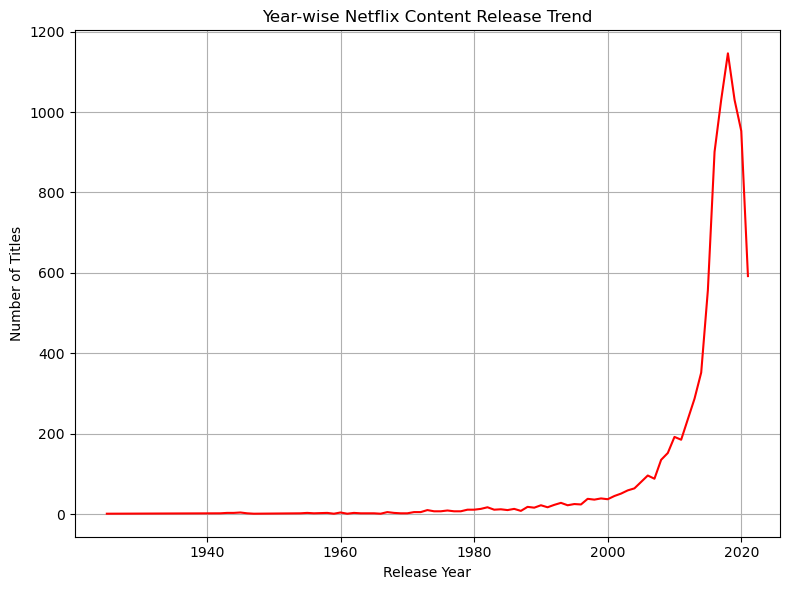

In [124]:
release=df.value_counts('release_year').sort_index()
plt.figure(figsize=(8,6))
plt.plot(release.index,release.values,color='red')
plt.title('Year-wise Netflix Content Release Trend')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.savefig('yearly_release_trend.png', dpi=300)
plt.show()


# Explanation:
- **Purpose**:  This line plot shows how many movies and shows were released each year on Netflix.

- `X-axis (release.index)`: Represents each release year (sorted).

- `Y-axis (release.values)`: Number of Netflix titles (movies/shows) released in that year.

- `Color`: The line is colored red for visibility.

- `Grid`: Makes it easier to track the trend visually.

- `tight_layout()`: Ensures nothing gets cut off in the plot.



# 🎬 Netflix Content per Year by Type (Movies vs TV Shows)

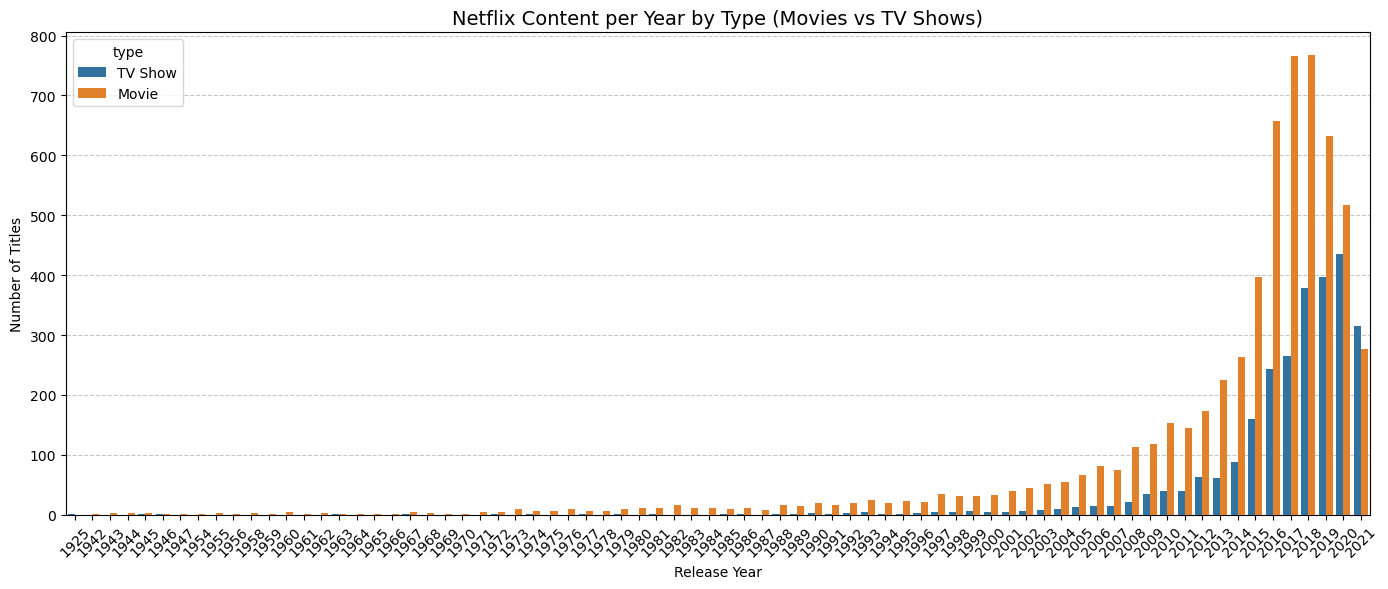

In [125]:
group_data=df.groupby(['release_year','type']).size().reset_index(name='count')

plt.figure(figsize=(14,6))
sns.barplot(data=group_data, x='release_year',y='count', hue='type' ,zorder=3)

plt.title('Netflix Content per Year by Type (Movies vs TV Shows)', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')

plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--',alpha=0.7)

plt.tight_layout()

plt.savefig('netflix_content_by_year_type.png', dpi=300)
plt.show()



- **Explanation**:
- *This grouped barplot shows the number of Movies and TV Shows released each year on Netflix*.

- *We used .groupby() on release_year and type to get yearly content count.*

*sns.barplot() helps to visualize both categories (Movies & TV Shows) side by side for comparison.*

*The hue='type' differentiates content by color.*

*xticks(rotation=45) improves readability of years.*

*The chart shows how Netflix’s focus on different types of content has changed over time.*

# 📊 Top 10 Countries with Most Content on Netflix

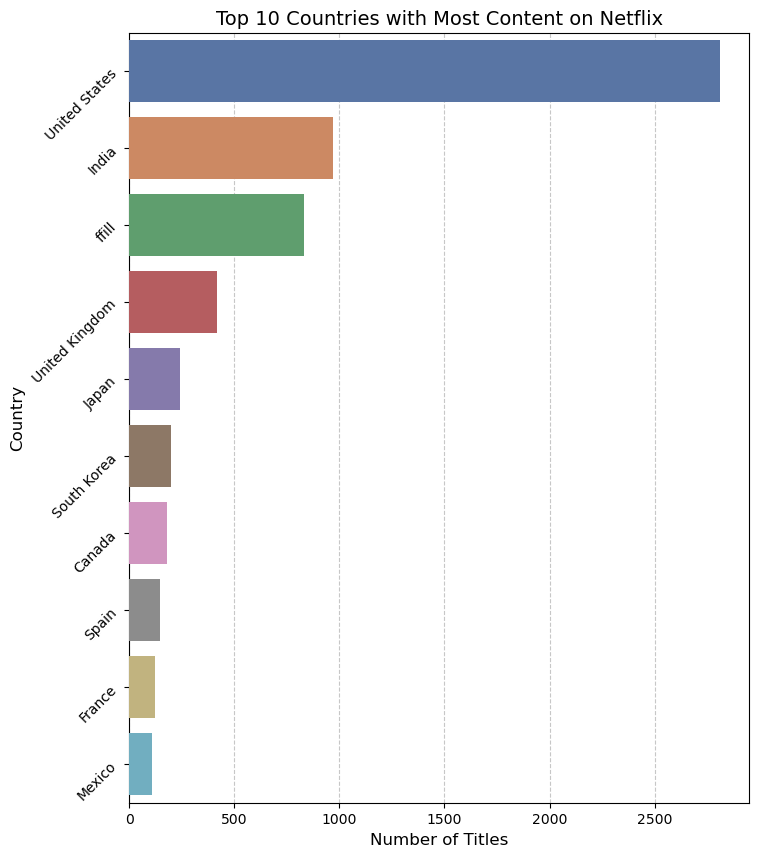

In [126]:

top_contries=df.groupby('country').size().reset_index(name='count').sort_values(by='count',ascending=False).head(10)
plt.figure(figsize=(8,10))
sns.barplot(x='count',y='country',data=top_contries,hue='country',palette='deep',zorder=3)

plt.title("Top 10 Countries with Most Content on Netflix", fontsize=14)
plt.xlabel("Number of Titles", fontsize=12)
plt.ylabel("Country", fontsize=12)

plt.yticks(rotation=45)     
plt.grid(axis='x',linestyle='--',alpha=0.7)
plt.savefig('top_10_countries_content.png', dpi=300)
plt.show()


# Explanation Cell:
## This barplot shows the top 10 countries with the highest number of Netflix titles.

- We first group the data by 'country' and count the number of titles available in each.
- The data is then sorted in descending order to pick the top 10 countries.
- Using sns.barplot(), we plot a horizontal bar chart:
- The x-axis represents the number of titles.
- The y-axis lists the countries.
- The 'hue' parameter differentiates each bar by color using the 'deep' palette.

 The plot provides insight into which countries dominate Netflix's content availability.

# Plotting Top 5 Netflix Content Ratings

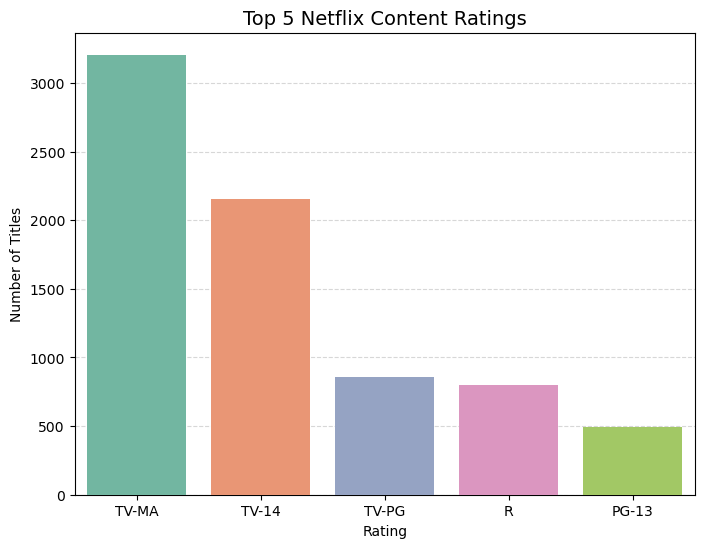

In [127]:
top_5_rating=df.value_counts('rating').head(5)
plt.figure(figsize=(8,6))
sns.barplot(x=top_5_rating.index,y=top_5_rating.values,hue=top_5_rating.index ,zorder=3, palette='Set2')

plt.title('Top 5 Netflix Content Ratings', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Number of Titles')

plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.savefig('top_5_ratings.png', dpi=300)
plt.show()


# Explanation Cell:
### This bar plot displays the top 5 most frequent content ratings on Netflix.

- We use value_counts() on the 'rating' column to count how many titles belong to each rating.
- Only the top 5 ratings are selected using head(5).
- sns.barplot() creates a colorful bar chart with:
- x-axis showing the rating categories (e.g., TV-MA, PG, etc.).
- y-axis showing the number of titles for each rating.
- hue differentiating bars by rating with the 'Set2' color palette.

## This chart helps identify which content ratings are most common on Netflix.

# Box Plot of Release Year Distribution by Top 5 Content Ratings


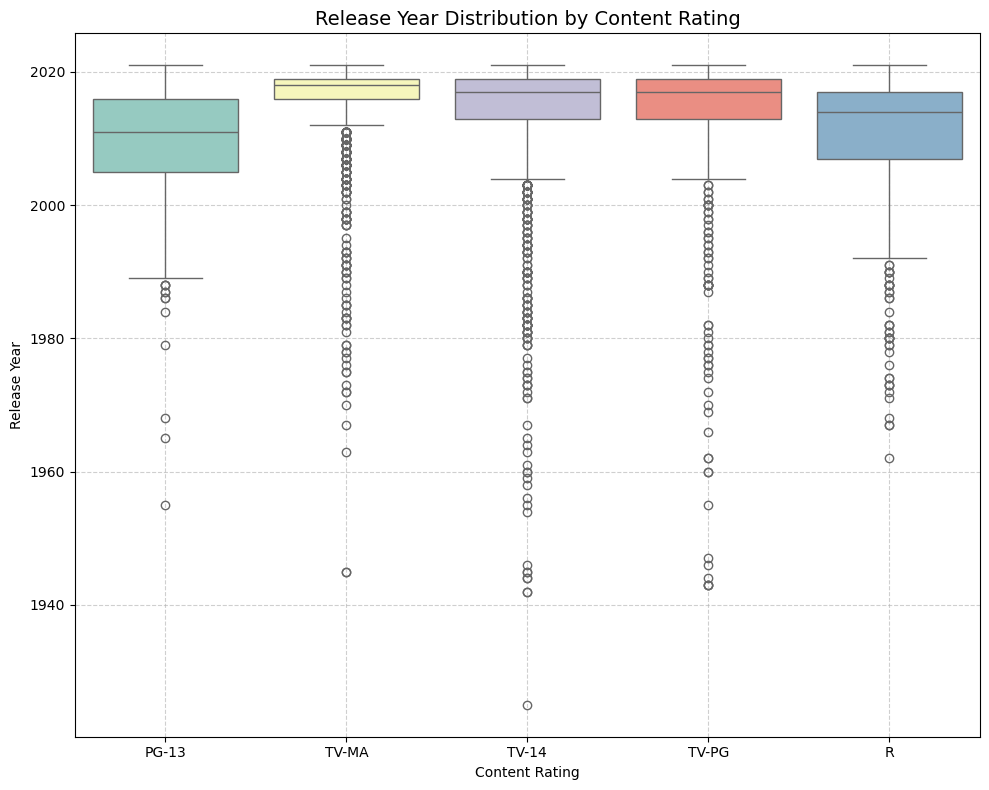

In [128]:
top=df.value_counts('rating').nlargest(5).index
filtered=df[df['rating'].isin(top)]

plt.figure(figsize=(10,8))

sns.boxplot(x='rating',y='release_year',data=filtered,hue='rating' ,palette='Set3')

plt.title('Release Year Distribution by Content Rating', fontsize=14)
plt.xlabel('Content Rating')
plt.ylabel('Release Year')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('release_year_by_rating.png', dpi=300)
plt.show()


# Explanation Cell:
### This box plot shows the distribution of release years for the top 5 most common Netflix content ratings.

- We first find the top 5 ratings using value_counts().nlargest(5).
- Then, we filter the original DataFrame to only include rows with those ratings.
- sns.boxplot() visualizes how the release years are spread for each rating:
- Each box shows the interquartile range (IQR).
- The line inside the box is the median release year.
- Whiskers show the range, and dots represent outliers.

#### This plot helps us understand how new or old the content tends to be for each rating category.

# Horizontal Bar Plot of Top 10 Most Common Netflix Genres


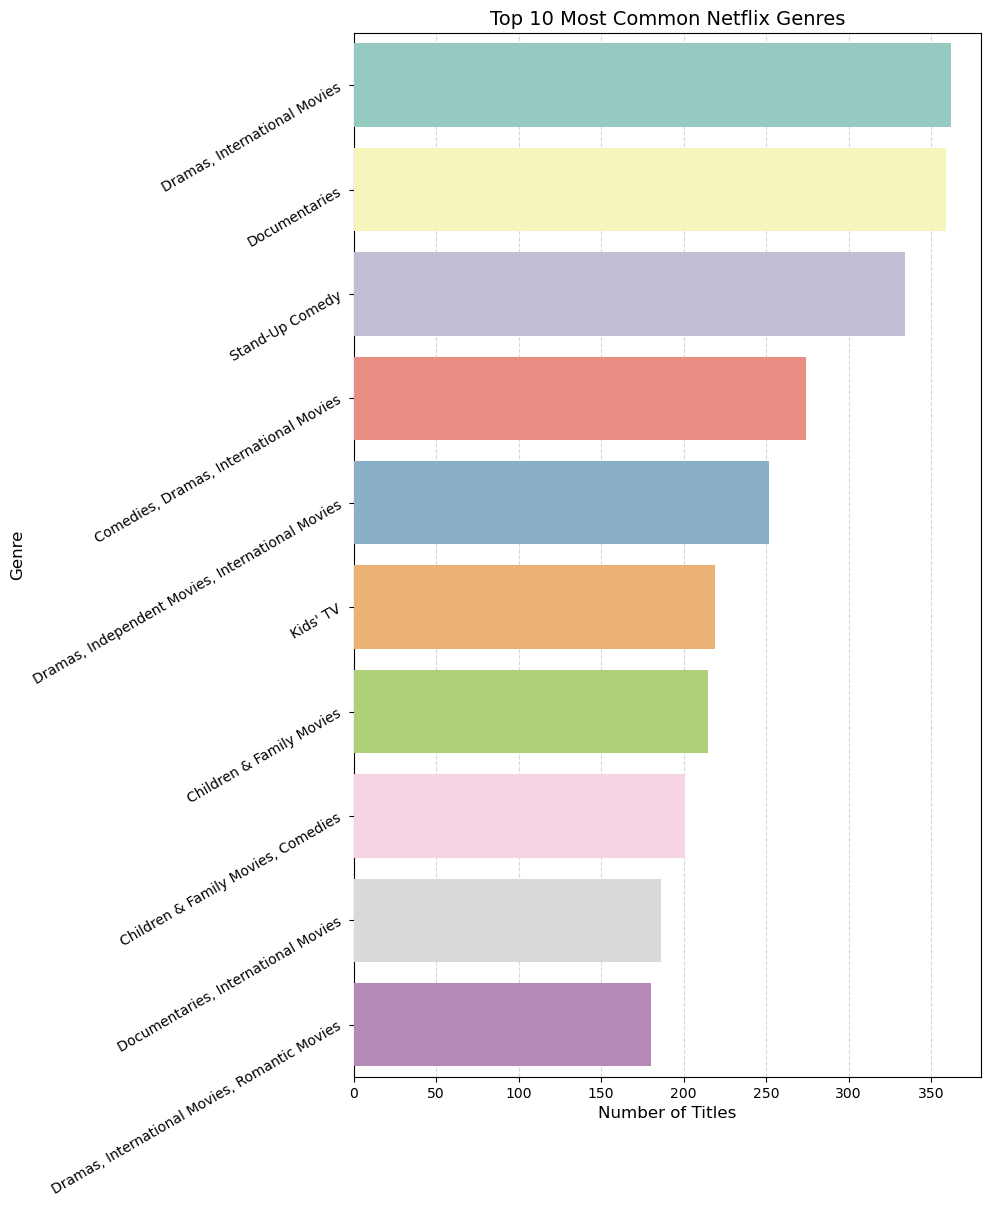

In [129]:
top_genre=df.groupby('listed_in').size().reset_index(name='count').sort_values(by='count',ascending=False).head(10)
plt.figure(figsize=(10,12))
sns.barplot(x='count',y='listed_in',data=top_genre,hue='listed_in',palette='Set3',zorder=4)

plt.grid(True,linestyle='--',alpha=0.5,axis='x')
plt.yticks(rotation=30)
plt.tight_layout()

plt.title('Top 10 Most Common Netflix Genres', fontsize=14)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Genre', fontsize=12)

plt.savefig('top_10_genres.png', dpi=300)
plt.show()


# Explanation Cell:
### This bar plot shows the top 10 most common genres available on Netflix.

- We used groupby('listed_in') to count the number of titles in each genre.
- Then we sorted the genres in descending order and selected the top 10.
- The sns.barplot creates a horizontal bar chart where:
- X-axis shows the number of titles.
- Y-axis shows the genre names.
- hue='listed_in' is used just to add distinct colors to the bars.

### This visualization helps identify which genres dominate Netflix's content,
### such as Documentaries, Dramas, Stand-Up Comedy, etc.


# Bar Plot of Top 10 Netflix Directors


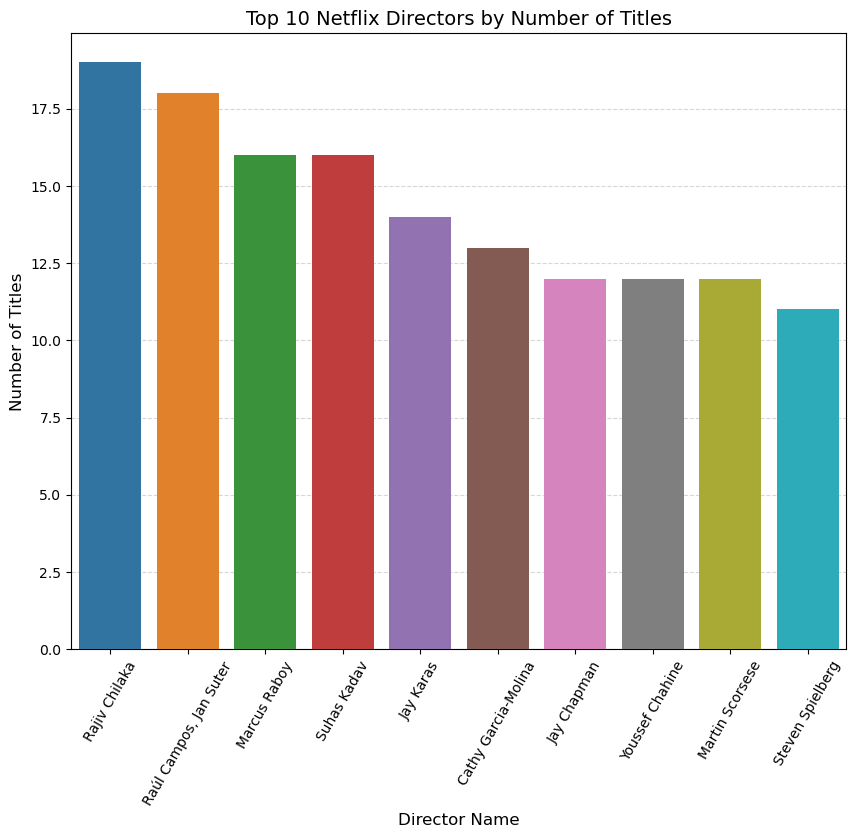

In [130]:
top10_director=df.value_counts('director')[1:].head(10).reset_index(name='count')
top10_director

plt.figure(figsize=(10,8))
sns.barplot(x='director',y='count',data=top10_director,hue='director',zorder=3)

plt.title('Top 10 Netflix Directors by Number of Titles', fontsize=14)
plt.xlabel('Director Name', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)

plt.xticks(rotation=60)
plt.grid(True, linestyle='--', axis='y', alpha=0.5)
plt.savefig('top_10_directors.png', dpi=300)
plt.show()


# Explanation Cell:
### This bar chart shows the top 10 directors on Netflix by the number of titles they directed.

- df.value_counts('director') is used to count how many titles each director has.
- We used [1:] to skip the first one, which is usually a missing value (NaN).
- head(10) selects the top 10 most frequent directors.

### The bar plot shows:
- X-axis: Director names (rotated for better readability).
- Y-axis: Number of titles they've directed.
- hue='director' adds color distinction between bars.

## This helps identify the most featured directors on Netflix.


# Pie Chart of Top 5 Netflix Actors

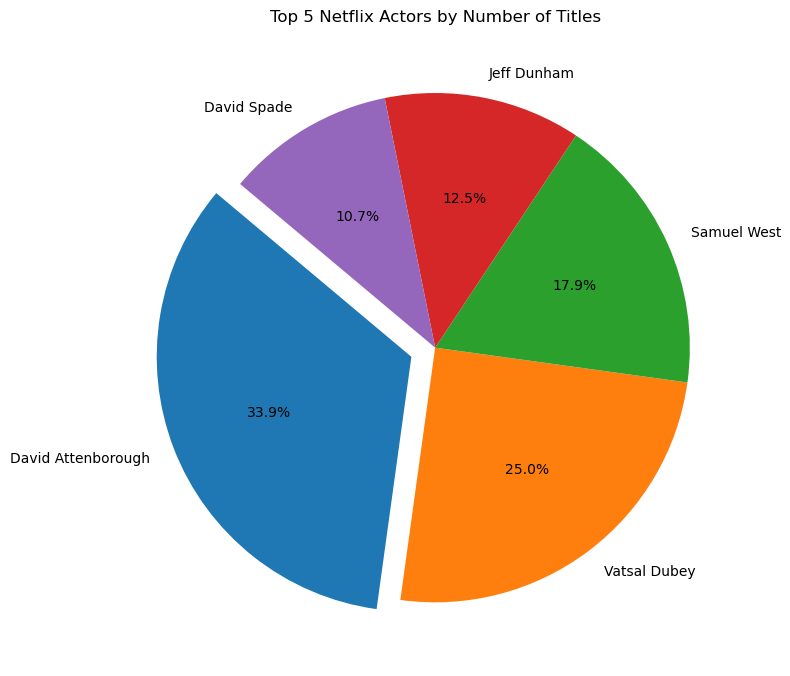

In [131]:
top_actor=df.value_counts('cast')[1:].nlargest(5).reset_index(name='count')
top_actor

labels = ['David Attenborough','Vatsal Dubey', 'Samuel West', 'Jeff Dunham', 'David Spade']
explode=[0.1,0,0,0,0]
plt.figure(figsize=(8,8))
plt.pie(top_actor['count'], labels=labels,autopct='%1.1f%%',explode=explode , startangle=140)

plt.title('Top 5 Netflix Actors by Number of Titles')
plt.tight_layout()
plt.savefig('top_5_actors_pie_chart.png', dpi=300)
plt.show()



# Explanation Cell:
### This pie chart shows the top 5 most featured actors on Netflix.

- df.value_counts('cast') counts how often each actor appears in the dataset.
- [1:] is used to skip the first value, which is usually a missing value (NaN).
- nlargest(5) selects the top 5 most frequent actors.

## For visualization:
- A pie chart is used to show each actor's share in percentage.
- `labels` are set manually for readability.
- `explode` highlights the top actor by slightly separating their slice.

### This makes it easy to see which actor has the most titles on Netflix.
